In [1]:
import re 
from os import path
import numpy as np
from PIL import Image
import pandas as pd
from konlpy.tag import Kkma
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
kkma = Kkma()

C:\Users\User\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [2]:
with open("devdog.txt", 'r', encoding='utf-8') as f:
    read_data = f.readlines()    

In [3]:
prepro = []
for i in read_data:
    prepro.append(i.rstrip('\n'))

In [4]:
tokens = []
for i in prepro:
    tokens += kkma.nouns(str(i))

In [5]:
for i in range(len(tokens)):
    tokens[i] = re.sub(".?[0-9]+.?","",str(tokens[i]))
    if len(tokens[i]) == 1:
        tokens[i] =""    

In [6]:
for i in tokens:
    try:
        tokens.remove("")
    except ValueError:
        break

In [7]:
stopwords = set(STOPWORDS)
stopwords = stopwords | {'세월'}

In [8]:
wordcloud = WordCloud(
    width = 500,
    height = 500,
    stopwords = stopwords,
    font_path = 'c:/Windows/Fonts/malgun.ttf',
    max_words = 300,
    background_color='black'
).generate(' '.join(tokens))

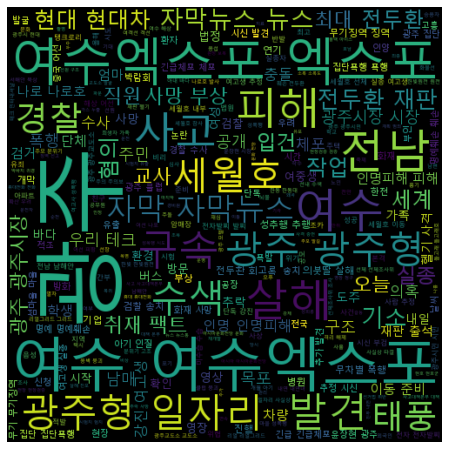

In [9]:
fig = plt.figure(figsize = (8, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()